## **1. Preprocesamiento**

In [1]:
import os
import shutil
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Directorios
ruta_base = '/Users/alexperez/Documents/GitHub/DM1/TextMining/dataset/Procesos'
ruta_clean = '/Users/alexperez/Documents/GitHub/DM1/TextMining/dataset/Procesos_Clean'

# Función para gestionar la carpeta clean
def gestionar_carpeta_clean(ruta_clean):
    try:
        if os.path.exists(ruta_clean):
            print(f'La carpeta {ruta_clean} ya existe, eliminando y recreando...')
            shutil.rmtree(ruta_clean)
        os.makedirs(ruta_clean)
        print(f'Carpeta {ruta_clean} creada nuevamente.')
    except Exception as e:
        print(f'Error al gestionar la carpeta {ruta_clean}: {e}')

# Lista de siglas irrelevantes o ruido
siglas_inecesarias = ['etc']
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    
    # Remover caracteres especiales, excepto letras, espacios y tildes
    texto = re.sub(r'[^a-záéíóúÁÉÍÓÚñÑ\s]', '', texto)
    
    # Tokenizar el texto
    palabras = word_tokenize(texto)
    
    # Eliminar stopwords en español
    stop_words = set(stopwords.words('spanish'))
    palabras_limpias = [palabra for palabra in palabras if palabra not in stop_words]
    
    # Eliminar palabras de menos de 3 caracteres
    palabras_limpias = [palabra for palabra in palabras_limpias if len(palabra) >= 3]
    
    # Eliminar secuencias de letras repetidas (ej. "aaa", "bbb")
    palabras_limpias = [palabra for palabra in palabras_limpias if not re.fullmatch(r'(.)\1+', palabra)]
    
    # Eliminar siglas irrelevantes
    palabras_limpias = [palabra for palabra in palabras_limpias if palabra not in siglas_inecesarias]
    
    # Unir las palabras limpias
    texto_limpio = ' '.join(palabras_limpias)
    
    return texto_limpio

# Función para procesar los archivos en cada carpeta
def procesar_archivos(carpeta_raiz, ruta_relativa):
    ruta_nueva_carpeta = os.path.join(ruta_clean, ruta_relativa)
    
    # Crear la nueva carpeta si no existe
    if not os.path.exists(ruta_nueva_carpeta):
        os.makedirs(ruta_nueva_carpeta)

    # Procesar cada archivo dentro de la carpeta
    for archivo in os.listdir(carpeta_raiz):
        if archivo.endswith('.txt'):  # Solo procesar archivos .txt
            ruta_archivo = os.path.join(carpeta_raiz, archivo)
            ruta_archivo_clean = os.path.join(ruta_nueva_carpeta, archivo)
            
            try:
                # Leer el contenido del archivo
                with open(ruta_archivo, 'r', encoding='utf-8') as file:
                    contenido = file.read()
                
                # Limpiar y normalizar el contenido
                contenido_limpio = limpiar_texto(contenido)
                
                # Guardar el archivo limpio en la nueva carpeta
                with open(ruta_archivo_clean, 'w', encoding='utf-8') as file_clean:
                    file_clean.write(contenido_limpio)

                # Imprimir el nombre del archivo procesado y su carpeta
                print(f'Procesado: {archivo} en la carpeta {ruta_relativa}')
            except Exception as e:
                print(f'Error al procesar el archivo {archivo}: {e}')

# Función principal para recorrer todas las carpetas
def limpiar_procesos(ruta_base):
    for carpeta_raiz, _, _ in os.walk(ruta_base):
        # Obtener la ruta relativa para recrear la misma estructura de carpetas
        ruta_relativa = os.path.relpath(carpeta_raiz, ruta_base)
        procesar_archivos(carpeta_raiz, ruta_relativa)

# Ejecutar todo el proceso
def ejecutar_limpieza():
    # Gestionar la carpeta clean
    gestionar_carpeta_clean(ruta_clean)
    
    # Limpiar los archivos
    limpiar_procesos(ruta_base)
    
    print("Limpieza de archivos completada.")

# Ejecutar el proceso de limpieza
ejecutar_limpieza()

Error al gestionar la carpeta /Users/alexperez/Documents/GitHub/DM1/TextMining/dataset/Procesos_Clean: [Errno 13] Permission denied: '/Users/alexperez'
Limpieza de archivos completada.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielagomez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielagomez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **2. Vectores TF-IDF**

In [3]:
import pandas as pd
import os

# Cargar archivos CSV
process_info = pd.read_csv('/Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/process_info.csv')
preguntas_y_aclaraciones = pd.read_csv('/Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/preguntas_y_aclaraciones.csv')
sample_files = pd.read_csv('/Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/sample_files.csv')

# Verificar que los datos se cargaron correctamente
print(process_info.head())
print(preguntas_y_aclaraciones.head())
print(sample_files.head())

   sl_contract_id                                         sd_entidad  \
0         1752147  GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...   
1         1689929  CENTRO CLINICO QUIRURGICO AMBULATORIO HOSPITAL...   
2         1737580  EMPRESA ELÉCTRICA PÚBLICA ESTRATÉGICA CORPORAC...   
3         1699371                         HOSPITAL BÁSICO-ESMERALDAS   
4         1712786  DIRECCION DISTRITAL 09D04 - FEBRES CORDERO - S...   

                                sd_objeto_de_proceso  sie_ic_promedio  
0  ADQUISICION DE UNA MAQUINA EXCAVADORA DE ORUGA...             0.86  
1  ADQUISICIÓN DEL PRIMER REQUERIMIENTO DE FÁRMAC...             0.73  
2         CORP ADQUISICION DE SELLOS DE SEGURIDAD GC             0.63  
3  ADQUISICION DE MEDICAMENTOS CUYO GRUPO TERAPÉU...             0.73  
4  CONTRATACIÓN DEL SERVICIO DE VIGILANCIA Y SEGU...             0.55  
   sl_contract_id  pregunta_id  \
0         1728041       326428   
1         1706638       332456   
2         1706638       332449   

In [5]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer

def textos_individuales_col1(sample_files):
    textos_por_documento = {}  # Diccionario para almacenar contenido de documentos por contract_id
    rutas_por_documento = {}   # Diccionario para almacenar rutas completas de los documentos por contract_id

    # Procesar los archivos de texto de los procesos (cada archivo es un documento independiente)
    for index, row in sample_files.iterrows():
        sl_contract_id = str(row['sl_contract_id'])
        file_name = row['file_name']  # Nombre del archivo

        # Ajustar la ruta para acceder a la carpeta correcta
        file_path = f"/Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/{sl_contract_id}/{file_name}.txt"

        try:
            # Verificar si el archivo existe
            if os.path.exists(file_path):
                # Leer el contenido del archivo
                with open(file_path, 'r', encoding='utf-8') as file:
                    contenido = file.read()
                
                # Almacenar el contenido del documento
                if sl_contract_id in textos_por_documento:
                    textos_por_documento[sl_contract_id].append(contenido)
                else:
                    textos_por_documento[sl_contract_id] = [contenido]
                
                # Almacenar la ruta del archivo
                if sl_contract_id in rutas_por_documento:
                    rutas_por_documento[sl_contract_id].append(file_path)
                else:
                    rutas_por_documento[sl_contract_id] = [file_path]
            else:
                print(f"Archivo no encontrado: {file_path}")

        except Exception as e:
            print(f"Error al leer el archivo {file_path}: {e}")

    # Retornar ambos: el contenido y las rutas completas de los documentos
    return textos_por_documento, rutas_por_documento

# Llamar a la función para obtener los textos individuales y las rutas (colección COL1)
textos_individuales_corpus_col1, rutas_documentos_col1 = textos_individuales_col1(sample_files)

# Descomponer los documentos en una lista donde cada documento es independiente, pero guardamos el proceso al que pertenecen
documentos_col1 = []  # Aquí se almacena el contenido de cada documento
procesos_col1 = []    # Aquí se almacena el proceso al que pertenece cada documento
rutas_col1 = []       # Aquí se almacena la ruta completa de cada documento

for proceso, documentos in textos_individuales_corpus_col1.items():
    for idx, documento in enumerate(documentos):
        documentos_col1.append(documento)  # Agregar el contenido del documento a la lista
        procesos_col1.append(proceso)      # Mantener el registro del proceso al que pertenece
        rutas_col1.append(rutas_documentos_col1[proceso][idx])  # Agregar la ruta completa a la lista

# Vectorizar los documentos individuales de COL1
vectorizer_col1 = TfidfVectorizer()
X_tfidf_col1 = vectorizer_col1.fit_transform(documentos_col1)

# Mostrar la forma de la matriz TF-IDF resultante para COL1
print(f"Matriz TF-IDF de COL1 con forma: {X_tfidf_col1.shape}")

# Verificar que los procesos están alineados con los documentos, imprimiendo el nombre del archivo
for i in range(20):  # Mostrar los primeros 20 documentos y sus procesos asociados
    print(f"Documento {i+1} pertenece al proceso {procesos_col1[i]} con ruta {rutas_col1[i]}")

# Verificar las dimensiones del diccionario de textos individuales
print("Número de procesos en COL1:", len(textos_individuales_corpus_col1))

Matriz TF-IDF de COL1 con forma: (828, 28546)
Documento 1 pertenece al proceso 1721524 con ruta /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1721524/tdr_logistica_actualizado.txt
Documento 2 pertenece al proceso 1721524 con ruta /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1721524/condiciones_generales_de_los_pliegos.txt
Documento 3 pertenece al proceso 1721524 con ruta /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1721524/condiciones_generales_del_contrato.txt
Documento 4 pertenece al proceso 1721524 con ruta /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1721524/condiciones_particulares_de_los_contratos.txt
Documento 5 pertenece al proceso 1721524 con ruta /Users/danielagomez/Desktop/NOBORRARDANI

In [7]:
# Función para concatenar textos de los archivos de procesos y preguntas/respuestas
def concatenar_textos(sample_files, preguntas_y_aclaraciones):
    textos_por_proceso = {}

    # Procesar los archivos de texto de los procesos
    for index, row in sample_files.iterrows():
        sl_contract_id = str(row['sl_contract_id'])
        file_name = row['file_name']  # Ajustar para obtener el nombre del archivo

        # Ajustar la ruta para acceder a la carpeta correcta
        file_path = f"/Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/{sl_contract_id}/{file_name}.txt"

        try:
            # Leer el contenido del archivo
            with open(file_path, 'r', encoding='utf-8') as file:
                contenido = file.read()
                contenido_limpio = limpiar_texto(contenido)  # Aplicar la función de limpieza

            # Concatenar contenido en caso de que ya existan otros archivos para ese proceso
            if sl_contract_id in textos_por_proceso:
                textos_por_proceso[sl_contract_id] += ' ' + contenido_limpio
            else:
                textos_por_proceso[sl_contract_id] = contenido_limpio
        except Exception as e:
            print(f"Error al leer el archivo {file_path}: {e}")

    # Procesar las preguntas y respuestas y concatenarlas al texto del proceso
    for index, row in preguntas_y_aclaraciones.iterrows():
        sl_contract_id = str(row['sl_contract_id'])

        # Convertir valores nulos a cadenas vacías antes de concatenar
        pregunta_aclaracion = str(row['pregunta_aclaracion']) if not pd.isna(row['pregunta_aclaracion']) else ''
        respuesta_aclaracion = str(row['respuesta_aclaracion']) if not pd.isna(row['respuesta_aclaracion']) else ''

        pregunta_respuesta = pregunta_aclaracion + ' ' + respuesta_aclaracion
        pregunta_respuesta_limpia = limpiar_texto(pregunta_respuesta)

        if sl_contract_id in textos_por_proceso:
            textos_por_proceso[sl_contract_id] += ' ' + pregunta_respuesta_limpia
        else:
            textos_por_proceso[sl_contract_id] = pregunta_respuesta_limpia

    return textos_por_proceso

# Llamar a la función para concatenar los textos (COL2)
textos_por_proceso = concatenar_textos(sample_files, preguntas_y_aclaraciones)

from sklearn.feature_extraction.text import TfidfVectorizer

# Crear una lista con los textos preprocesados y concatenados por proceso
corpus = list(textos_por_proceso.values())
contract_ids = list(textos_por_proceso.keys())

# Crear el vectorizador TF-IDF y ajustar con el contenido completo
vectorizer_col2 = TfidfVectorizer()
X_tfidf_col2 = vectorizer_col2.fit_transform(corpus)  # Aquí estamos haciendo fit con todo el corpus

# Mostrar la forma de la matriz TF-IDF resultante para COL2
print(f"Matriz TF-IDF de COL2 con forma: {X_tfidf_col2.shape}")

# Mostrar las dimensiones del dicccionario de la colección COL2
print("Número de procesos en COL2:", len(textos_por_proceso))

for i in range(20):  # Mostrar los primeros 5 documentos y sus procesos asociados
    print(f"Documento {i+1} pertenece al proceso {contract_ids[i]}")

Matriz TF-IDF de COL2 con forma: (107, 30981)
Número de procesos en COL2: 107
Documento 1 pertenece al proceso 1721524
Documento 2 pertenece al proceso 1699371
Documento 3 pertenece al proceso 1745524
Documento 4 pertenece al proceso 1758687
Documento 5 pertenece al proceso 1704225
Documento 6 pertenece al proceso 1747722
Documento 7 pertenece al proceso 1686226
Documento 8 pertenece al proceso 1709477
Documento 9 pertenece al proceso 1755826
Documento 10 pertenece al proceso 1728041
Documento 11 pertenece al proceso 1682008
Documento 12 pertenece al proceso 1743489
Documento 13 pertenece al proceso 1709875
Documento 14 pertenece al proceso 1706638
Documento 15 pertenece al proceso 1716637
Documento 16 pertenece al proceso 1730092
Documento 17 pertenece al proceso 1736958
Documento 18 pertenece al proceso 1718330
Documento 19 pertenece al proceso 1750232
Documento 20 pertenece al proceso 1682777


## **3. Cálculo de TF, DF, IDF y TF-IDF para COL1 y COL2**

### A. Cálculo para COL1

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Ya tienes el TfidfVectorizer para COL1
# Mostramos los nombres de los términos (palabras) del vocabulario de COL1
terms_col1 = vectorizer_col1.get_feature_names_out()

# Obtenemos la matriz de cuenta de términos (TF y DF) usando CountVectorizer
count_vectorizer_col1 = CountVectorizer()
X_count_col1 = count_vectorizer_col1.fit_transform(documentos_col1)

# TF: Frecuencia de términos en todos los documentos de COL1
tf_col1 = np.sum(X_count_col1.toarray(), axis=0)

# DF: Número de documentos en los que aparece cada término en COL1
df_col1 = np.sum(X_count_col1.toarray() > 0, axis=0)

# IDF: Ya está calculado en el TfidfVectorizer
idf_col1 = vectorizer_col1.idf_

# Mostrar resultados para los primeros 15 términos
for i in range(15):
    term = terms_col1[i]
    print(f"Término: {term}")
    print(f"TF (Frecuencia de Término) en COL1: {tf_col1[i]}")
    print(f"DF (Frecuencia de Documento) en COL1: {df_col1[i]}")
    print(f"IDF (Frecuencia Inversa de Documento) en COL1: {idf_col1[i]}")
    
    # Mostrar el valor de TF-IDF del término en los primeros documentos
    print(f"TF-IDF en los primeros documentos de COL1: {X_tfidf_col1[:, i].toarray().flatten()[:20]}")
    print(f"TF-IDF en los primeros documentos de COL1: {X_tfidf_col1[:, i].toarray().flatten().shape}")
    print("-" * 40)

Término: aabsly
TF (Frecuencia de Término) en COL1: 1
DF (Frecuencia de Documento) en COL1: 1
IDF (Frecuencia Inversa de Documento) en COL1: 7.02707297457535
TF-IDF en los primeros documentos de COL1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
TF-IDF en los primeros documentos de COL1: (828,)
----------------------------------------
Término: aac
TF (Frecuencia de Término) en COL1: 4
DF (Frecuencia de Documento) en COL1: 2
IDF (Frecuencia Inversa de Documento) en COL1: 6.621607866467185
TF-IDF en los primeros documentos de COL1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
TF-IDF en los primeros documentos de COL1: (828,)
----------------------------------------
Término: aad
TF (Frecuencia de Término) en COL1: 2
DF (Frecuencia de Documento) en COL1: 1
IDF (Frecuencia Inversa de Documento) en COL1: 7.02707297457535
TF-IDF en los primeros documentos de COL1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
TF-IDF en los primeros documentos 

### B. Cálculo para COL2

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Mostramos los nombres de los términos (palabras) del vocabulario de COL2
terms_col2 = vectorizer_col2.get_feature_names_out()

# Obtenemos la matriz de cuenta de términos (TF y DF) usando CountVectorizer
count_vectorizer_col2 = CountVectorizer()
X_count_col2 = count_vectorizer_col2.fit_transform(textos_por_proceso.values())

# TF: Frecuencia de términos en todos los documentos de COL1
tf_col2 = np.sum(X_count_col2.toarray(), axis=0)

# DF: Número de documentos en los que aparece cada término en COL1
df_col2 = np.sum(X_count_col2.toarray() > 0, axis=0)

# IDF: Ya está calculado en el TfidfVectorizer
idf_col2 = vectorizer_col2.idf_

# Mostrar resultados para los primeros 15 términos
for i in range(15):
    term = terms_col2[i]
    print(f"Término: {term}")
    print(f"TF (Frecuencia de Término) en COL2: {tf_col2[i]}")
    print(f"DF (Frecuencia de Documento) en COL2: {df_col2[i]}")
    print(f"IDF (Frecuencia Inversa de Documento) en COL2: {idf_col2[i]}")
    
    # Mostrar el valor de TF-IDF del término en los primeros documentos
    print(f"TF-IDF en los primeros documentos de COL2: {X_tfidf_col2[:, i].toarray().flatten()[:20]}")
    print(f"TF-IDF en los primeros documentos de COL2: {X_tfidf_col2[:, i].toarray().flatten().shape}")
    print("-" * 40)

Término: aabsly
TF (Frecuencia de Término) en COL2: 1
DF (Frecuencia de Documento) en COL2: 1
IDF (Frecuencia Inversa de Documento) en COL2: 4.9889840465642745
TF-IDF en los primeros documentos de COL2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
TF-IDF en los primeros documentos de COL2: (107,)
----------------------------------------
Término: aac
TF (Frecuencia de Término) en COL2: 4
DF (Frecuencia de Documento) en COL2: 2
IDF (Frecuencia Inversa de Documento) en COL2: 4.58351893845611
TF-IDF en los primeros documentos de COL2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
TF-IDF en los primeros documentos de COL2: (107,)
----------------------------------------
Término: aad
TF (Frecuencia de Término) en COL2: 2
DF (Frecuencia de Documento) en COL2: 1
IDF (Frecuencia Inversa de Documento) en COL2: 4.9889840465642745
TF-IDF en los primeros documentos de COL2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
TF-IDF en los primeros document

## **SIMILARIDAD DEL COSENO PARA COL1 Y COL2**

### A. COL1

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la similaridad del coseno entre los vectores de Col1 (documentos individuales)
cosine_sim_col1 = cosine_similarity(X_tfidf_col1)

# Mostrar las primeras 5 filas de la matriz de similaridad de Col1
print("Similaridad del coseno para COL1:")
print(cosine_sim_col1[:5, :5])  # Muestra solo una parte de la matriz para los primeros 5 documentos

#dimensiones del cosine_sim_col1
#print("Dimensiones de la matriz de similaridad de COL1: ", cosine_sim_col1.shape)

Similaridad del coseno para COL1:
[[1.         0.15950175 0.14925726 0.13071005 0.11530442]
 [0.15950175 1.         0.593634   0.53944657 0.52362667]
 [0.14925726 0.593634   1.         0.63055357 0.43870581]
 [0.13071005 0.53944657 0.63055357 1.         0.33883736]
 [0.11530442 0.52362667 0.43870581 0.33883736 1.        ]]


### B. COL2

In [11]:
# Calcular la similaridad del coseno entre los vectores de Col2 (textos concatenados por proceso)
cosine_sim_col2 = cosine_similarity(X_tfidf_col2)

# Mostrar las primeras 5 filas de la matriz de similaridad de Col2
print("Similaridad del coseno para COL2:")
print(cosine_sim_col2[:5, :5])  # Muestra solo una parte de la matriz para los primeros 5 procesos

#dimensiones del cosine_sim_col2
print("Dimensiones de la matriz de similaridad de COL2: ", cosine_sim_col2.shape)

Similaridad del coseno para COL2:
[[1.         0.85290713 0.81512639 0.77703935 0.82511581]
 [0.85290713 1.         0.94492198 0.88030493 0.92715093]
 [0.81512639 0.94492198 1.         0.85261588 0.88680407]
 [0.77703935 0.88030493 0.85261588 1.         0.85209043]
 [0.82511581 0.92715093 0.88680407 0.85209043 1.        ]]
Dimensiones de la matriz de similaridad de COL2:  (107, 107)


## **RANKING DE DOCUMENTOS POR SIMILARIDAD EN COL1 Y EN COL2**

### COL1

In [12]:
def obtener_ranking_documentos(cosine_sim, rutas, documento_referencia_idx):
    # Mostrar con qué documento se están comparando los demás
    print(f"Comparando todos los documentos con el documento: {rutas[documento_referencia_idx]}")
    
    # Ordenar documentos por similaridad
    ranking = sorted(enumerate(cosine_sim), key=lambda x: x[1], reverse=True)
    
    print(f"\nRanking de documentos similares al documento elegido ({rutas[documento_referencia_idx]}): ")
    for idx, sim in ranking[:20]:  # Mostrar los 20 documentos más similares
        print(f'Documento: {rutas[idx]}, Similaridad: {sim}')

# Mostrar el ranking de documentos similares para el segundo documento en Col1
print(f"Ranking de documentos similares para el documento elegido en COL1:")
obtener_ranking_documentos(cosine_sim_col1[0], rutas_col1, 0)

Ranking de documentos similares para el documento elegido en COL1:
Comparando todos los documentos con el documento: /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1721524/tdr_logistica_actualizado.txt

Ranking de documentos similares al documento elegido (/Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1721524/tdr_logistica_actualizado.txt): 
Documento: /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1721524/tdr_logistica_actualizado.txt, Similaridad: 1.0000000000000002
Documento: /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1721524/sie-30-2022_condiciones_particulares_de_los_pliegos-signed.txt, Similaridad: 0.753079483624818
Documento: /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/Organizaci

### 1. a. COL1

In [13]:
def ranking_documentos_por_query(query, sl_contract_id, textos_individuales_corpus_col1, rutas_col1):
    # Obtener los documentos del proceso dado (sl_contract_id)
    documentos_proceso = textos_individuales_corpus_col1.get(sl_contract_id, [])
    rutas_proceso = [ruta for idx, ruta in enumerate(rutas_col1) if procesos_col1[idx] == sl_contract_id]
    
    if not documentos_proceso:
        print(f"No se encontraron documentos para el proceso {sl_contract_id}")
        return

    # Vectorizar los documentos del proceso
    vectorizer_proceso = TfidfVectorizer()
    X_tfidf_proceso = vectorizer_proceso.fit_transform(documentos_proceso)
    
    # Vectorizar la consulta del usuario
    query_vector = vectorizer_proceso.transform([query])
    
    # Calcular la similaridad del coseno entre la consulta y los documentos del proceso
    cosine_sim_query = cosine_similarity(query_vector, X_tfidf_proceso).flatten()
    
    # Mostrar el ranking de los documentos más relevantes con respecto a la query
    ranking = sorted(enumerate(cosine_sim_query), key=lambda x: x[1], reverse=True)
    
    print(f"\nRanking de documentos del proceso {sl_contract_id} respecto a la consulta '{query}':")
    for idx, sim in ranking[:20]:  # Mostrar los 20 documentos más similares
        print(f'Documento: {rutas_proceso[idx]}, Similaridad: {sim}')


In [14]:
# Dada una consulta del usuario (query)
#query = "¿Cuál es el alcance del contrato?"
sl_contract_id = input("Ingrese el ID del contrato: ")
query = input("Ingrese su consulta: ")
ranking_documentos_por_query(query, sl_contract_id, textos_individuales_corpus_col1, rutas_col1)


Ranking de documentos del proceso 1758687 respecto a la consulta '¿Cuáles son las características técnicas y funcionalidades requeridas para la máquina medidora de conductores eléctricos que se busca adquirir para la bodega de La Libertad de CNEL EP Unidad de Negocio Santa Elena?':
Documento: /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1758687/anexo_1_-_especificaciones_tecnicas.txt, Similaridad: 0.3756677582106783
Documento: /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1758687/anexo_2_catalogos_y_folletos.txt, Similaridad: 0.21828887198910144
Documento: /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1758687/condiciones_del_contrato.txt, Similaridad: 0.022159508355031707
Documento: /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/Te

### 1. b. COL1

In [15]:
# Función para concatenar preguntas y respuestas para cada proceso
def concatenar_preguntas_respuestas(preguntas_y_aclaraciones):
    preguntas_por_proceso = {}
    
    for index, row in preguntas_y_aclaraciones.iterrows():
        sl_contract_id = str(row['sl_contract_id'])
        pregunta_aclaracion = str(row['pregunta_aclaracion']) if not pd.isna(row['pregunta_aclaracion']) else ''
        respuesta_aclaracion = str(row['respuesta_aclaracion']) if not pd.isna(row['respuesta_aclaracion']) else ''
        texto_completo = pregunta_aclaracion + ' ' + respuesta_aclaracion
        texto_completo_limpio = limpiar_texto(texto_completo)
        
        if sl_contract_id in preguntas_por_proceso:
            preguntas_por_proceso[sl_contract_id] += ' ' + texto_completo_limpio
        else:
            preguntas_por_proceso[sl_contract_id] = texto_completo_limpio
    
    return preguntas_por_proceso

# Llamamos a la función
preguntas_respuestas_corpus = concatenar_preguntas_respuestas(preguntas_y_aclaraciones)

# Concatenamos las preguntas y respuestas en un solo corpus para el análisis
corpus_preguntas_respuestas = list(preguntas_respuestas_corpus.values())
contract_ids_preguntas_respuestas = list(preguntas_respuestas_corpus.keys())

# Vectorizamos las preguntas y respuestas
vectorizer_preguntas_respuestas = TfidfVectorizer()
X_tfidf_preguntas_respuestas = vectorizer_preguntas_respuestas.fit_transform(corpus_preguntas_respuestas)

# Verificamos la forma de la matriz
print(f"Matriz TF-IDF para preguntas y respuestas con forma: {X_tfidf_preguntas_respuestas.shape}")

# Podemos ahora calcular la similaridad del coseno
cosine_sim_preguntas_respuestas = cosine_similarity(X_tfidf_preguntas_respuestas)

# Mostrar las primeras 5 filas de la matriz de similaridad
print("Similaridad del coseno para preguntas y respuestas:")
print(cosine_sim_preguntas_respuestas[:5, :5])

# Función para obtener el ranking de los documentos basados en preguntas y respuestas
def ranking_documentos_por_preguntas_respuestas(sl_contract_id, textos_individuales_corpus_col1, rutas_col1):
    # Obtener los documentos del proceso dado (sl_contract_id)
    documentos_proceso = textos_individuales_corpus_col1.get(sl_contract_id, [])
    rutas_proceso = [ruta for idx, ruta in enumerate(rutas_col1) if procesos_col1[idx] == sl_contract_id]
    
    if not documentos_proceso:
        print(f"No se encontraron documentos para el proceso {sl_contract_id}")
        return

    # Vectorizar los documentos del proceso
    vectorizer_proceso = TfidfVectorizer()
    X_tfidf_proceso = vectorizer_proceso.fit_transform(documentos_proceso)
    
    # Vectorizar las preguntas y respuestas del proceso
    preguntas_respuestas = preguntas_respuestas_corpus.get(sl_contract_id, '')
    query_vector = vectorizer_proceso.transform([preguntas_respuestas])
    
    # Calcular la similaridad del coseno entre las preguntas/respuestas y los documentos del proceso
    cosine_sim_query = cosine_similarity(query_vector, X_tfidf_proceso).flatten()
    
    # Mostrar el ranking de los documentos más relevantes con respecto a las preguntas/respuestas
    ranking = sorted(enumerate(cosine_sim_query), key=lambda x: x[1], reverse=True)
    
    print(f"\nRanking de documentos del proceso {sl_contract_id} respecto a las preguntas y respuestas:")
    for idx, sim in ranking[:20]:  # Mostrar los 20 documentos más similares
        print(f'Documento: {rutas_proceso[idx]}, Similaridad: {sim}')

# Ejemplo de uso para un proceso específico como sl_contract_id = "1736958"
sl_contract_id = input("Ingrese el ID del contrato para ranking de preguntas y aclaraciones: ")
ranking_documentos_por_preguntas_respuestas(sl_contract_id, textos_individuales_corpus_col1, rutas_col1)

Matriz TF-IDF para preguntas y respuestas con forma: (107, 6528)
Similaridad del coseno para preguntas y respuestas:
[[1.         0.04159566 0.00359359 0.04987836 0.01403752]
 [0.04159566 1.         0.1107586  0.07967086 0.05762655]
 [0.00359359 0.1107586  1.         0.02129109 0.03135952]
 [0.04987836 0.07967086 0.02129109 1.         0.05639428]
 [0.01403752 0.05762655 0.03135952 0.05639428 1.        ]]

Ranking de documentos del proceso 1736958 respecto a las preguntas y respuestas:
Documento: /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1736958/2_condiciones_generales_del_pliego_de_subasta_inversa_electronica_bienes_y_servicios.txt, Similaridad: 0.19489454778894597
Documento: /Users/danielagomez/Desktop/NOBORRARDANIELA/6TOSEMESTRE/OrganizacionComputadores/DM1/TextMining/dataset/Procesos_Clean/1736958/4_especificaciones_motosoldadora-signed-signed.txt, Similaridad: 0.10572689580559605
Documento: /Users/danielag

### COL2

In [16]:
def obtener_ranking_procesos(cosine_sim, contract_ids, proceso_referencia_idx):
    # Mostrar con qué proceso se están comparando los demás
    print(f"Comparando todos los procesos con el proceso: {contract_ids[proceso_referencia_idx]}")
    

    ranking = sorted(enumerate(cosine_sim), key=lambda x: x[1], reverse=True)
    print(f"\nRanking de procesos similares al proceso elegido ({contract_ids[proceso_referencia_idx]}): ")
    for idx, sim in ranking[:20]:  # Mostrar los 20 procesos más similares
        print(f'Proceso: {contract_ids[idx]} (Similaridad: {sim})')


# Mostrar el ranking de procesos similares para el proceso con índice 17
print(f"Ranking de procesos similares para el proceso elegido en COL2:")
obtener_ranking_procesos(cosine_sim_col2[0], contract_ids, 0)

Ranking de procesos similares para el proceso elegido en COL2:
Comparando todos los procesos con el proceso: 1721524

Ranking de procesos similares al proceso elegido (1721524): 
Proceso: 1721524 (Similaridad: 1.0000000000000002)
Proceso: 1742137 (Similaridad: 0.8530238522423299)
Proceso: 1699371 (Similaridad: 0.8529071286747614)
Proceso: 1743301 (Similaridad: 0.8528930629915712)
Proceso: 1685410 (Similaridad: 0.8515333368927585)
Proceso: 1702911 (Similaridad: 0.8502804340782855)
Proceso: 1756064 (Similaridad: 0.8501164307025243)
Proceso: 1737426 (Similaridad: 0.8407809560540542)
Proceso: 1748550 (Similaridad: 0.8407425057128444)
Proceso: 1723420 (Similaridad: 0.8385440912640436)
Proceso: 1710100 (Similaridad: 0.8382252742277467)
Proceso: 1695084 (Similaridad: 0.8338871045775291)
Proceso: 1682777 (Similaridad: 0.8330481208247196)
Proceso: 1726894 (Similaridad: 0.8277552876379497)
Proceso: 1752147 (Similaridad: 0.8274744953492267)
Proceso: 1704225 (Similaridad: 0.8251158147560711)
Proce

### 2. a. COL2

In [17]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Seleccionamos un proceso con sie_ic_promedio alto (ej: 0.85)
proceso_alto_riesgo = process_info[process_info['sie_ic_promedio'] >= 0.85].iloc[0]  # Seleccionar el primer proceso con alto riesgo
sl_contract_id_alto_riesgo = str(proceso_alto_riesgo['sl_contract_id'])

# Verificar si el proceso existe en la colección de textos
if sl_contract_id_alto_riesgo in textos_por_proceso:
    texto_proceso_alto_riesgo = textos_por_proceso[sl_contract_id_alto_riesgo]
    
    # Reutilizar el mismo vectorizador que usaste para COL2
    X_tfidf_proceso_alto_riesgo = vectorizer_col2.transform([texto_proceso_alto_riesgo])  # Notar que aquí uso .transform(), no .fit_transform()

    # Calcular la similaridad del coseno con todos los documentos de COL2
    cosine_sim_proceso_alto_riesgo = cosine_similarity(X_tfidf_proceso_alto_riesgo, X_tfidf_col2).flatten()

    # Crear un ranking descendente basado en la similaridad
    ranking = sorted(enumerate(cosine_sim_proceso_alto_riesgo), key=lambda x: x[1], reverse=True)

    # Imprimir los primeros 20 documentos del ranking
    print(f"Ranking de documentos similares al proceso {sl_contract_id_alto_riesgo} (sie_ic_promedio = {proceso_alto_riesgo['sie_ic_promedio']}):")
    for idx, sim in ranking[:20]:
        print(f"Documento {idx}, Similaridad: {sim}")
else:
    print(f"No se encontró el proceso con ID {sl_contract_id_alto_riesgo} en la colección COL2.")


Ranking de documentos similares al proceso 1752147 (sie_ic_promedio = 0.86):
Documento 101, Similaridad: 1.0000000000000007
Documento 24, Similaridad: 0.9561871701409626
Documento 105, Similaridad: 0.9529641589945081
Documento 41, Similaridad: 0.9525816981369454
Documento 1, Similaridad: 0.9509962604521727
Documento 65, Similaridad: 0.9493665727906325
Documento 47, Similaridad: 0.9487883115229293
Documento 94, Similaridad: 0.9448892550196221
Documento 22, Similaridad: 0.9419269091063588
Documento 89, Similaridad: 0.9362317032488073
Documento 81, Similaridad: 0.9354377632573077
Documento 20, Similaridad: 0.9323602883029578
Documento 99, Similaridad: 0.9285590355112489
Documento 28, Similaridad: 0.9283409428797329
Documento 19, Similaridad: 0.9245699894901251
Documento 37, Similaridad: 0.9168077807732855
Documento 103, Similaridad: 0.9152523963059149
Documento 4, Similaridad: 0.9105428271902098
Documento 60, Similaridad: 0.9079126276361325
Documento 2, Similaridad: 0.9069206014514074


### 2. b. COL2

In [19]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 771 kB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Número de procesos: 107, Número de entradas en sie_ic_promedio: 107


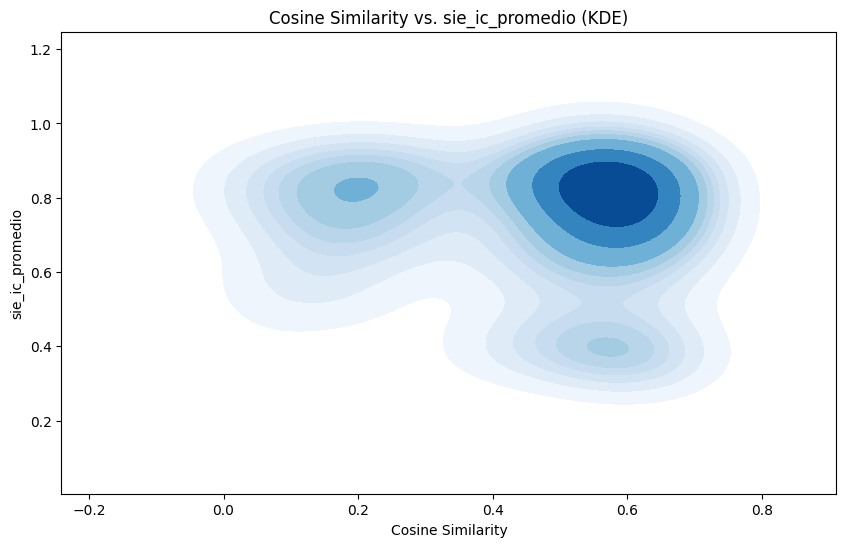

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Reutilizamos el vectorizador de COL2 para garantizar coherencia
vectorizer = TfidfVectorizer()

# Vectorizar todos los textos concatenados de COL2
corpus_col2 = list(textos_por_proceso.values())  # Los textos de COL2 ya concatenados por proceso
X_tfidf_col2 = vectorizer.fit_transform(corpus_col2)

# Calcular la similaridad del coseno entre todos los documentos de COL2
cosine_sim_col2 = cosine_similarity(X_tfidf_col2)

# Extraer el índice promedio de similaridad por proceso (similaridad promedio con todos los demás documentos)
similaridades_promedio = cosine_sim_col2.mean(axis=1)

# Asegúrate de que 'similaridades_promedio' tenga la misma longitud que 'sie_ic_promedio'
print(f"Número de procesos: {len(similaridades_promedio)}, Número de entradas en sie_ic_promedio: {process_info['sie_ic_promedio'].shape[0]}")

# Crear un gráfico KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 6))
sns.kdeplot(x=similaridades_promedio, y=process_info['sie_ic_promedio'], fill=True, cmap="Blues", thresh=0.1)
plt.title('Cosine Similarity vs. sie_ic_promedio (KDE)')
plt.xlabel('Cosine Similarity')
plt.ylabel('sie_ic_promedio')
plt.show()

### 2. c. COL2

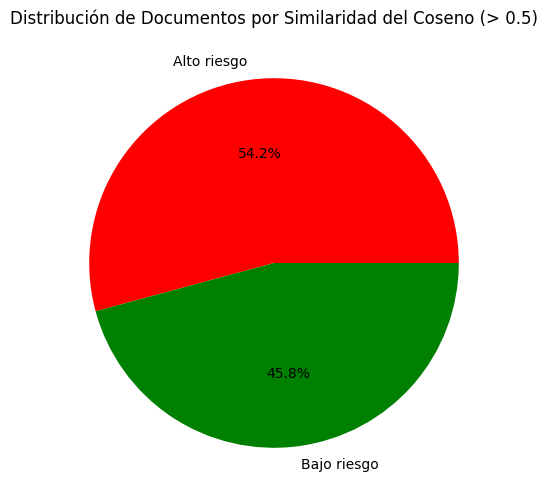

In [21]:
# Proporción de documentos con similaridad > 0.5
alto_riesgo_similaridad = sum(similaridades_promedio > 0.5)
bajo_riesgo_similaridad = sum(similaridades_promedio <= 0.5)

# Gráfico tipo pastel basado en la similaridad del coseno
plt.figure(figsize=(6, 6))
plt.pie([alto_riesgo_similaridad, bajo_riesgo_similaridad], labels=["Alto riesgo", "Bajo riesgo"], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Distribución de Documentos por Similaridad del Coseno (> 0.5)')
plt.show()

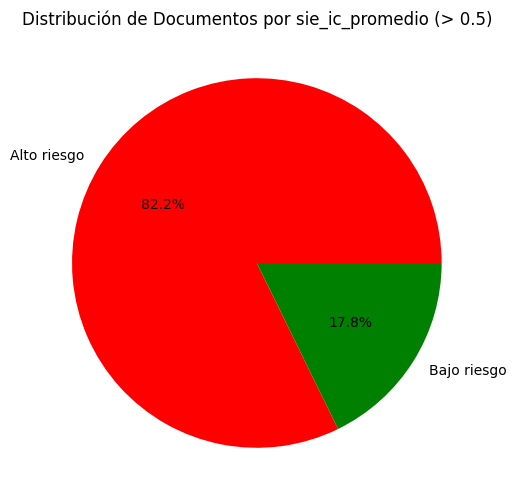

In [25]:
# Proporción de documentos con sie_ic_promedio > 0.5
alto_riesgo_real = sum(process_info['sie_ic_promedio'] > 0.5)
bajo_riesgo_real = sum(process_info['sie_ic_promedio'] <= 0.5)

# Gráfico tipo pastel basado en el índice de riesgo real
plt.figure(figsize=(6, 6))
plt.pie([alto_riesgo_real, bajo_riesgo_real], labels=["Alto riesgo", "Bajo riesgo"], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Distribución de Documentos por sie_ic_promedio (> 0.5)')
plt.show()

Matriz de similaridad (dimensión [n x n]):
[[1.         0.85290713 0.81512639 ... 0.63335784 0.85153334 0.04164825]
 [0.85290713 1.         0.94492198 ... 0.66882904 0.99669318 0.034784  ]
 [0.81512639 0.94492198 1.         ... 0.65096414 0.9451058  0.03571794]
 ...
 [0.63335784 0.66882904 0.65096414 ... 1.         0.67039572 0.02734438]
 [0.85153334 0.99669318 0.9451058  ... 0.67039572 1.         0.03467095]
 [0.04164825 0.034784   0.03571794 ... 0.02734438 0.03467095 1.        ]]

Vector columna con la similaridad promedio de cada documento (dimensión [n x 1]):
[0.56642996 0.63646315 0.61353238 0.59989111 0.61420358 0.27462539
 0.55009914 0.23532631 0.53373384 0.25352251 0.61453674 0.04288004
 0.16691528 0.17128181 0.61022438 0.52879086 0.36838663 0.5210794
 0.42506462 0.62467202 0.62599385 0.23185006 0.63297885 0.25216957
 0.63789879 0.13492251 0.5923917  0.33448482 0.62883356 0.60349517
 0.43657991 0.25294024 0.1797949  0.13896598 0.44933914 0.47010544
 0.2272992  0.61957554 0.5171

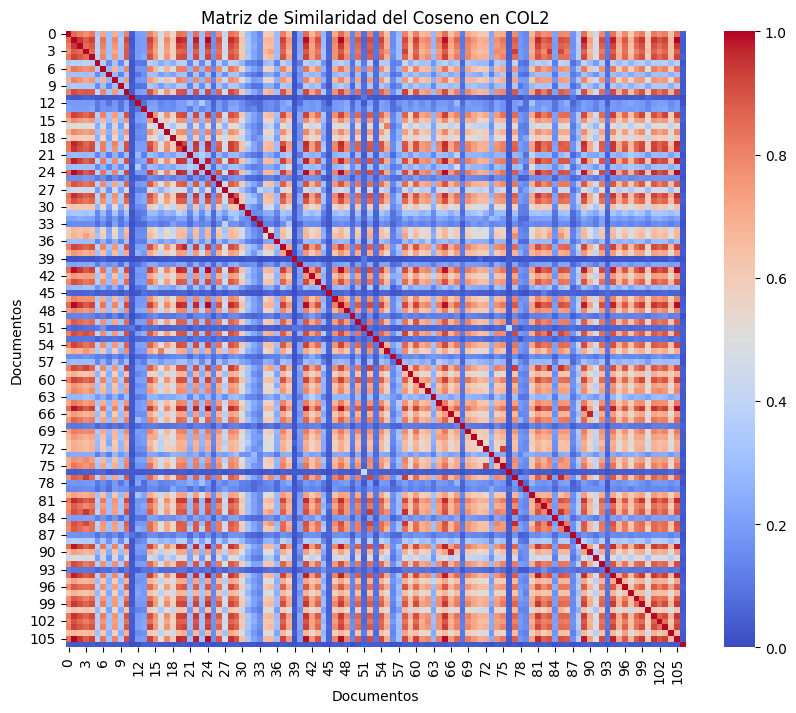

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la similaridad del coseno entre todos los documentos de COL2
cosine_sim_col2 = cosine_similarity(X_tfidf_col2)

# Calcular el vector columna con la similaridad promedio de cada documento con respecto a los demás
similaridades_promedio_col2 = cosine_sim_col2.mean(axis=1)

# Mostrar la matriz de similaridad y el vector de similaridades promedio
print("Matriz de similaridad (dimensión [n x n]):")
print(cosine_sim_col2)

print("\nVector columna con la similaridad promedio de cada documento (dimensión [n x 1]):")
print(similaridades_promedio_col2)

# Graficar la matriz de similaridad del coseno de los docs en la COL2

plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_col2, annot=False, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Matriz de Similaridad del Coseno en COL2")
plt.xlabel("Documentos")
plt.ylabel("Documentos")
plt.show()



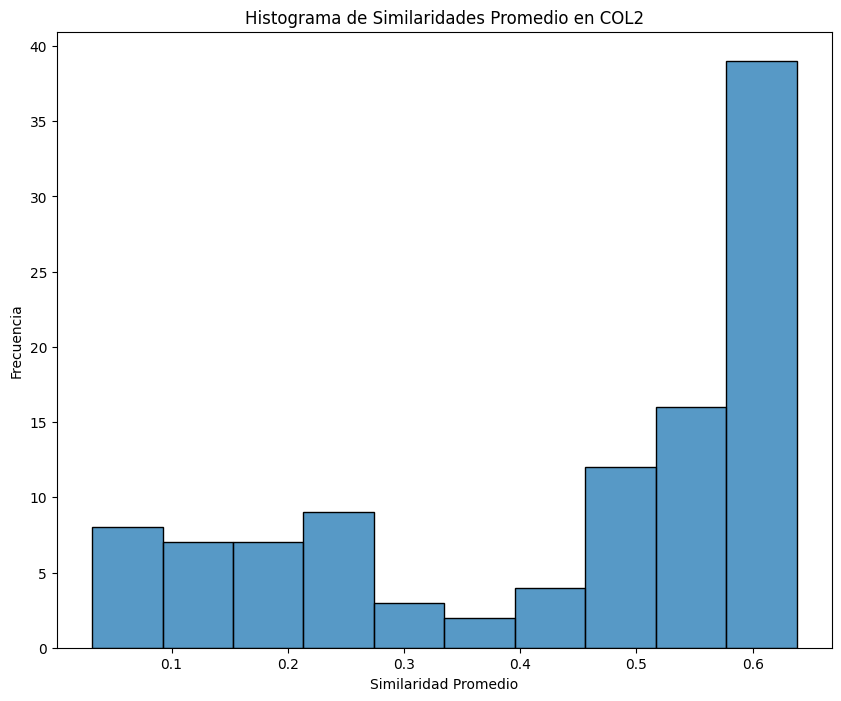

In [37]:
# Graficar un histograma de las similaridades promedio de los documentos en la COL2
plt.figure(figsize=(10, 8))
sns.histplot(similaridades_promedio_col2, bins=10, kde=False)
plt.title("Histograma de Similaridades Promedio en COL2")
plt.xlabel("Similaridad Promedio")
plt.ylabel("Frecuencia")
plt.show() 
